<a href="https://colab.research.google.com/github/hueyning/DeepLearningTutorial/blob/master/DL_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To do:
* clean up nn class
* finish backprop concept breakdown
* compare relu vs sigmoid? Compare learning rates?
* Weight decay?

# Deep Learning Assignment 1: Neural Network Fundamentals





In this assignment, we will implement a neural network from scratch either in Numpy or in PyTorch but without using any of PyTorch’s implementations for layers, optimizers, loss functions, callbacks etc - all significant logic relating to the neural network should be written by the student. We are only allowed to use PyTorch for Numpy-like GPU-accelerated tensor manipulation, dataset-related data structures, and optionally gradient calculations (autograd).

### Requirements:

Implement a fully-connected (feed-forward) neural network from scratch in your library of choice. The NN must include at least dense layers, activations, and sigmoid/softmax in case of classification. You must also write your own optimizer and loss function (for example, stochastic gradient descent and binary cross-entropy for binary classification). You may use PyTorch’s built-in gradient calculator (autograd) or you may write one yourself.

Finally, include runtime and results on a public dataset (MNIST? CIFAR10?).

Please document your code and write a brief summary which includes any interesting technical details and your results.

### Extensions:

Implement one or more of the following, and include a comparison of the model’s performance with/without each component:

* Manually calculate the gradients of each layer, and perform back propagation manually.
* More than 1 activation function - sigmoid, tanh, relu etc.
* More than 1 optimizer - SGD, Momentum, RMSProp, Adam etc.
* Regularization - L2/weight decay, dropout, possibly augmentations if image data etc.


### Submission:

Please put all your code, results, and discussion in a jupyter notebook, and submit a pdf of the notebook for ease of grading. You may also make a secondary submission of the notebook (*.ipynb) or the code (*.py), but this is optional and might not be looked at.

# Assignment Layout

The assignment will consist of two main parts:

1. Conceptual breakdown of the fundamentals of neural network architecture and the training process. This will allow me to grasp the fundamentals needed to code a neural network from scratch.

2. Coding of the neural network using Pytorch.



 

# Conceptual Breakdown

The steps for training a neural network can be broken down as follows:

## 1. Initialize the network parameters.

### 1.1 Fixed Parameters

The fixed parameters are the number of neurons in each layer, aka the layer size. These are usually defined by the user and determined as according to our dataset needs. 

#### 1.1.1 Input size and hidden layer size

The number of neurons in the input layer and hidden layer(s) can be defined arbitrarily or according to common best practices. Increasing the number of neurons (and number of layers) can increase the model capacity, i.e. the space of representable functions, which allows the modelling of more complex relations, but also makes the model prone to overfitting (Kaparthy, 2019). It is a general rule of thumb that the number of learnable parameters should not exceed the number of data points. That being said, Kaparthy argues that neural networks that are overfitting can and should be adjusted using regularization methods vs reducing the neuron count (2019).

Given the layer size(s) $s$, we can calculate the number of learnable parameters, $p$, from a fully-connected network with $N$ number of layers as follows:

$p_{\text{weights}} = \sum_{i=0}^{N}{s_{i}\cdot s_{i+1}}$

$p_{\text{bias}} = \sum_{i=1}^{N}{s_i}$

$p = p_{\text{weights}} + p_{\text{bias}}$

In the equations above, $i=0$ denotes the input layer and $i=N$ denotes the output layer.

#### 1.1.2 Output size

In cases of binary classification or regression, the final output size should be one. In multilabel classification, the final output size should correspond to the number of classes.

### 1.2 Learnable Parameters

While fixed parameters are only initialized once when defining the network, learnable parameters are continuously updated throughout the training process to minimize training loss and adjust the model's predicted outputs to be closer to the actual output.

The learnable parameters consist of the model weights and biases, and are usually randomly initialized.

#### 1.2.1 Weights

The weights determine the relationship between the neurons in a given layer to the neurons in the layer before and after it. The heavier the weight, the stronger the interneuron connection, and the stronger the implication that the neuron significantly affects our model's prediction ability. This is mostly relevant in regards to the input layer where the neurons may represent clear features of a given dataset. Neurons in the hidden layers are often less interpretable since they have undergone multiple transformations, though there have been relatively successful attempts at visualizing hidden layer features as shown in Olah, Mordvintsev, and Schubert (2017).

#### 1.2.2 Bias

The bias term allows us to adjust the displacement of the output functions of any given layer to achieve a better fit that reduces loss, i.e. the difference between predicted $\hat{y}$ and actual $y$.

## 2. Perform a feed-forward pass to compute the predicted output.

According to Karpathy (2019), "[t]he forward pass of a fully-connected layer corresponds to one matrix multiplication followed by a bias offset and an activation function". The forward pass allows us to use the parameters that we have been training to predict an output based on our input. The steps are as follows:

For each layer in the network:

### 2.1 Multiply the layer inputs by their corresponding weights and add the bias offset.

Given a layer with weights $\vec{w}$, inputs $\vec{x}$, and bias term $b$, the output (before activation) can be calculated as follows:

$o = \vec{w} \cdot \vec{x} + b$


### 2.2 Apply an activation function.

Since the output is linear, we need to apply an activation function to model non-linearity within our layer outputs. Given an activation function $g(x)$, our output can then be written as:

$o = g(\vec{w} \cdot \vec{x} + b)$

Example activation functions include the sigmoid, softmax, rectified linear units (ReLU), etc.

## 3. Compute the loss.

The loss is defined as the difference between the predicted output $\hat{y}$ and the actual output $y$ for an input $\vec{x}$. The loss is calculated using the loss function, which can take on different forms as called for by the given problem.


For regression problems, we typically use the mean squared error (MSE) as a loss function. For classification problems, we typically use cross-entropy loss (also called log loss).

## 4. Update parameters using gradient descent and backpropagation.

Given a MSE loss function $L(X) = \frac{1}{n}\sum_{i=1}^{n}{(\hat{y_i} - y_i)^2}$, where $X$ denotes a set of input-output pairs $X=\{(\vec{x_1},y_1),...,(\vec{x_n},y_n)\}$, $\hat{y}$ denotes the predicted output, and ${y}$ denotes the actual output, we see that when $\hat{y} = y$, $L(X) = 0$. As such, a natural objective is to minimize the loss function to achieve more accurate output. This can be done by adjusting the parameters that will affect the output, as shown in section 2.2. 

### 4.1 Minimizing loss and updating parameters using gradient descent.
Since we are trying to minimize the loss, this is an optimization problem that can be solved using gradient descent. We typically use stochastic gradient descent (SGD) whereby a parameter update is performed for each training example $x_i$ and training label $y_i$ (Ruder, 2018). Each iteration of gradient descent would be carried out as follows:

$\theta_{t+1} = \theta_t - \alpha \cdot \nabla_\theta L( \theta; x^{(i)}; y^{(i)})$

where $\alpha$ represents the learning rate (usually user-defined and should follow industry best practices) and $\nabla_\theta L( \theta; x^{(i)}; y^{(i)})$ represents the gradient of the loss function w.r.t the parameters.

As seen from the update equation, each gradient descent step will update our parameters in the direction that decreases loss. If the loss term $(\alpha \cdot \nabla_\theta L( \theta; x^{(i)}; y^{(i)})$ is positive, then the parameter values are decreased, i.e. we want to decrease the significance of this parameter since it is increasing loss. If the loss term is negative, then the parameter values are increased, i.e. we want to increase the significance of this parameter since it is decreasing loss. 

Through gradient descent, we iteratively update our parameters to achieve a local optima where loss is minimized.

### 4.2 Calculating loss function gradient w.r.t. the parameters using backpropagation.

The backpropagation algorithm uses the chain rule to calculate the gradient of the loss function w.r.t. to the parameters, i.e. the weights and biases. 

(Google Developers, 2019)



# Coding the Neural Network

In [0]:
# import libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## Neural Network Class

The neural network class consists of the following components:



In [0]:
# define neural network class

class NeuralNetwork:
  
  def __init__(self, layers, loss_func, activation, alpha = 0.01):
    
    '''
    Basic neural network class that can be trained on a given set of data using the self.train method.
    
    Inputs:
    
      layers (ARRAY-type, e.g. tensor, np.array, list)
      
        - Defines the architecture of the neural network.
        - The array should contain sub-arrays that represent the network layers, so that 
          number of sub-arrays == number of layers in network (including input and output layers).
          Ex: [[...],[...],[...]] would represent a network with 3 layers.
        - The sub-arrays should each contain 2 numbers, the first representing the number of input neurons
          and the second representing the number of output neurons.
          Ex: [5,3] would represent a layer with 5 input neurons and 3 output neurons.
          The following layer must accordingly have 3 input neurons, e.g. [3, x]
        
      loss_func (STR)
      
        - Defines the loss function to be used in the neural network.
        - Options: 'MAE', 'MSE'
        
      activation (STR)
      
        - Defines the activation function to be used in the neural network.
        - Only one type of activation function can be chosen, and this activation function
          will be applied to each layer in the network, including the output layer.
        - Options: 'sigmoid', 'softmax', 'relu'
        
      alpha (FLOAT)
      
        - Defines the learning rate to be used in the optimization method (SGD).
        - Default: 0.01
        
    '''
    
    self.weight_dct = {} # empty dict to store layer weights
    self.output_dct = {} # empty dict to store layer outputs
    self.delta_dct = {} # empty dict to store loss gradients
    
    for l in range(len(layers)):
      # randomly initialize layer weights according to input, output neurons designated
      self.weight_dct[l] = torch.randn(layers[l,0], layers[l,1]) # TODO: torch.parameters
      
    self.loss_func = loss_func #type of loss function
    self.activation = activation #type of activation function
    self.alpha = alpha # learning rate
  
  
  def active_func(self, s, prime=False): 
    
    # REFACTOR: put activation and loss as external input params to the class
    
    if self.activation == "sigmoid": # BINARY # Sigmoid < Relu for activations # Sigmoid < softmax for output cuz only for 2 classes
      if prime == True: return s * (1-s)
      return 1/(1 + torch.exp(-s))   
    
    elif self.activation == "softmax": # ONLY AT END OF NETWORK - MULTICLASS
      if prime == True:
        return 
      e = torch.exp(s)
      return e / torch.sum(e, axis=1, keepdims=True)
    
    elif self.activation == "relu": # ACTIVATION FOR EVERY LAYER EXCEPT LAST
      if prime == True: return 1. * (s > 0).float()
      return s * (s > 0).float()
    
    
  def calculate_loss(self, output, y):
    
    if self.loss_func == 'MAE':
      diff = y - output
      return abs(diff)
    
    elif self.loss_func == 'MSE':
      diff = y - output
      return diff**2
    
    elif self.loss_func == 'CCE':
      CCE_loss = nn.CrossEntropyLoss()
      return CCE_loss(output, y)
    
    
  def categorical_cross_entropy(self, y_pred, y_true):
    
    # probability vector for ground truth "0 0 0 1 0 0 0 0" # one-hot encode labels
    # probability vector for predictions # softmax output layer
    
    y_pred = torch.clamp(y_pred, 1e-9, 1 - 1e-9)
    y_true = y_true.float()
    #y_pred = y_pred.gather(1, y_true.view(-1,1))
    result = -(y_true * torch.t(torch.log(y_pred))).sum(dim=1)
    return result
    
    
  def forward(self, x):
    
    # TODO: Change dictionary keys to array since my code is so sequential (for loops to matmul)
    # TODO: Bias
    
    output = 0 # initialize output value as 0
    
    for i in range(len(self.weight_dct)): # loop through each layer in the network

      output = torch.matmul(x, self.weight_dct[i]) # multiply the layer input by its weights
      output = self.active_func(output) # activation function
      self.output_dct[i] = output # add output to the output dict
      x = output # pass the output as the input to the next layer
      
      # TODO: Remove activation function for final output

    return output # return output as series of numbers
  
  
  def backward(self, x, y, output):
    
    
    output_err = self.calculate_loss(output, y)
    output_delta = output_err * self.active_func(output, prime=True)
    
    for i in reversed(range(1, len(self.weight_dct))):
      
      error = torch.matmul(output_delta, torch.t(self.weight_dct[i]))
      delta = error * self.active_func(self.output_dct[i], prime=True)
    
      self.delta_dct[i] = delta
       
  
  def optimize(self, x):
    
    inpt = x
    
    for i in range(len(self.weight_dct)-1):  
      
      loss_gradient = torch.matmul(torch.t(inpt), self.delta_dct[i+1])
      self.weight_dct[i] -= self.alpha * loss_gradient 
      
      # the input for the next layer, i + 1, will be the output from the layer before it, i
      inpt = self.output_dct[i] 
      
      
  def train(self, x, y):
    
    # forward pass
    o = self.forward(x)
    # backward pass
    self.backward(x, y, o)
    # optimize
    self.optimize(x)
    

## Neural Network Test: Fake Data

### Create the Fake Data

In [0]:
np.random.seed(2)

def f(x):
  '''
  '''
  return torch.mean(x, dim=1)**2 + torch.mean(x, dim=1) + np.random.normal(0, 0.05)

# train set
X_train = torch.randn(100, 5) 
y_train = f(X_train).reshape(-1, 1)

# test set
X_test = torch.randn(30, 5) 
y_test = f(X_test).reshape(-1, 1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([100, 5]) torch.Size([30, 5]) torch.Size([100, 1]) torch.Size([30, 1])


### Run the Neural Network

Epoch 0
Train Loss: tensor(0.6435)
Test Loss: tensor(0.6395)
Epoch 100
Train Loss: tensor(0.6230)
Test Loss: tensor(0.6264)
Epoch 200
Train Loss: tensor(0.6028)
Test Loss: tensor(0.6134)
Epoch 300
Train Loss: tensor(0.5838)
Test Loss: tensor(0.6011)
Epoch 400
Train Loss: tensor(0.5666)
Test Loss: tensor(0.5897)
Epoch 500
Train Loss: tensor(0.5513)
Test Loss: tensor(0.5795)
Epoch 600
Train Loss: tensor(0.5379)
Test Loss: tensor(0.5706)
Epoch 700
Train Loss: tensor(0.5262)
Test Loss: tensor(0.5628)
Epoch 800
Train Loss: tensor(0.5159)
Test Loss: tensor(0.5560)
Epoch 900
Train Loss: tensor(0.5069)
Test Loss: tensor(0.5501)


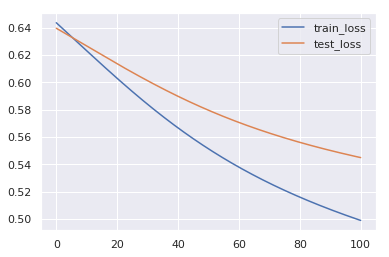

In [0]:
def run_nn(NN, X_train, y_train, X_test, y_test):
  # keep track of train and test loss
  running_train_loss = []
  running_test_loss = []

  for i in range(1000):

    # train network
    NN.train(X_train, y_train)
    train_loss = torch.mean(NN.calculate_loss(NN.forward(X_train), y_train))
    running_train_loss.append(train_loss)

    # test network
    test_loss = torch.mean(NN.calculate_loss(NN.forward(X_test), y_test))
    running_test_loss.append(test_loss)

    if i % 100 == 0:
      print(f"Epoch {i}")
      print ("Train Loss: " + str(train_loss)) 
      print ("Test Loss: " + str(test_loss)) 

  plt.plot(np.linspace(0,100,1000), running_train_loss, label='train_loss')
  plt.plot(np.linspace(0,100,1000), running_test_loss, label='test_loss')
  plt.legend()
  
# define layer sizes
input_s = X_train.size()[1]
hidden_s = 10
output_s = 1

# initialize network
NN = NeuralNetwork(layers = torch.tensor([[input_s, hidden_s],[hidden_s, output_s]]),
                   loss_func = 'MSE',
                   activation = 'sigmoid',
                   alpha = 0.001)


run_nn(NN, X_train, y_train, X_test, y_test)

## Neural Network Test: Public Dataset

### Import Boston Housing Prices Dataset

In [42]:
# load data
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


### Transform and Preprocess Data

In [43]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(boston.data)
y = scaler.fit_transform(boston.target.reshape(-1, 1))

# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339, 1) (167, 1)


In [45]:
# transform data into tensor with dtype = Float
def transform_to_tensor(data):
  return torch.tensor(data, dtype=torch.float)

X_train = transform_to_tensor(X_train)
X_test = transform_to_tensor(X_test)
y_train = transform_to_tensor(y_train)
y_test = transform_to_tensor(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([339, 13]) torch.Size([167, 13]) torch.Size([339, 1]) torch.Size([167, 1])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


### Run the Neural Network

Epoch 0
Train Loss: tensor(1.0393)
Test Loss: tensor(0.9039)
Epoch 100
Train Loss: tensor(1.0417)
Test Loss: tensor(0.9048)
Epoch 200
Train Loss: tensor(1.0428)
Test Loss: tensor(0.9052)
Epoch 300
Train Loss: tensor(1.0434)
Test Loss: tensor(0.9054)
Epoch 400
Train Loss: tensor(1.0439)
Test Loss: tensor(0.9056)
Epoch 500
Train Loss: tensor(1.0442)
Test Loss: tensor(0.9057)
Epoch 600
Train Loss: tensor(1.0445)
Test Loss: tensor(0.9058)
Epoch 700
Train Loss: tensor(1.0447)
Test Loss: tensor(0.9059)
Epoch 800
Train Loss: tensor(1.0449)
Test Loss: tensor(0.9060)
Epoch 900
Train Loss: tensor(1.0450)
Test Loss: tensor(0.9060)


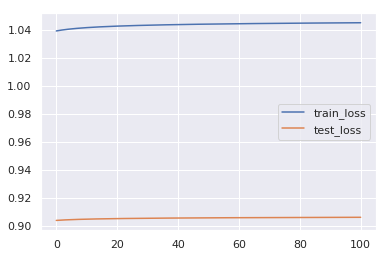

In [51]:
# define layer sizes
input_s = X_train.shape[1]
hidden_s = 50
output_s = 1

# initialize network
NN = NeuralNetwork(layers = torch.tensor([[input_s, hidden_s],[hidden_s, output_s]]),
                   loss_func = 'MSE',
                   activation = 'sigmoid',
                   alpha = 0.001)


run_nn(NN, X_train, y_train, X_test, y_test)

In [0]:
# invert scaling for loss (what does 1.2 mean?)

# MNIST

In [0]:
# import and transform data

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

Tensor batch dimensions: torch.Size([64, 1, 28, 28])


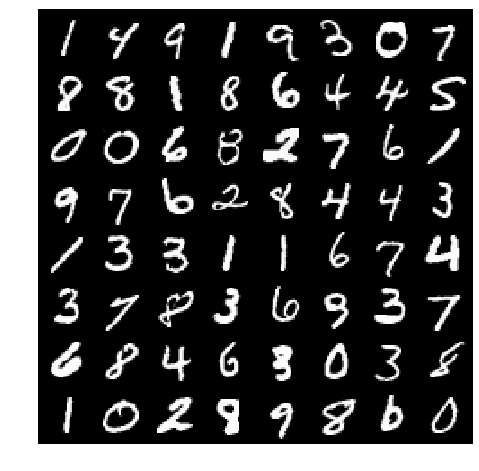

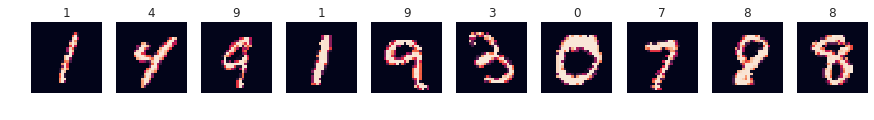

In [0]:
# Get a batch of training data
inputs, classes = next(iter(trainloader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs, normalize = True)
out = out.permute((1,2,0)) # rearrange the tensor axes for PIL imshow

plt.figure(figsize=(8,8))
plt.imshow(out)
plt.axis('off')
print(f"Tensor batch dimensions: {inputs.shape}")

plt.figure(figsize=(15, 3))

for i in range(10):
  out = transforms.ToPILImage()(inputs[i])
  plt.subplot(1,10,i+1)
  plt.imshow(out)
  plt.title(f"{classes[i]}")  
  plt.axis('off')

plt.show()

In [0]:
inputs.view(inputs.shape[0], -1).size()

torch.Size([64, 784])

# References



Brilliant.org (2019). Feedforward Neural Networks. Retrieved October 14, 2019, from https://brilliant.org/wiki/feedforward-neural-networks/

Google Developers. (2019). Backpropagation Demo. Retrieved October 14, 2019, from https://google-developers.appspot.com/machine-learning/crash-course/backprop-scroll/.

Karpathy, A. (2016). Cs231n convolutional neural networks for visual recognition. Neural networks, 1. Retrieved October 14, 2019, from http://cs231n.github.io/neural-networks-1/.

Olah, C., Mordvintsev, A., & Schubert, L. (2017). Feature visualization. Distill, 2(11), e7.

Ruder, S. (2018, November 29). An overview of gradient descent optimization algorithms. Retrieved October 14, 2019, from http://ruder.io/optimizing-gradient-descent/index.html#stochasticgradientdescent.